# Erin Rumelhart - Observing with `astroplan`

* I have given you three locations, some constraints, and list of targets: `TargetStars.csv`.
* You are observing on June 21, 2018.
* Your job is to determine which of the three locations can see the most targets, given the constraints.
* Points awarded will depend on how clearly you support your answer.

# Date: June 21, 2018.

---

# Locations

- Grytviken, South Georgia Island
- Bairiki, South Tarawa, Kiribati
- Lochboisdale, Outer Hebrides, Scotland

---

# Constraints

- Observing at (local) night
- Airmass < 2
- Moon Separation > 30 degrees

---

As shown by the graphs, Bairiki, South Tarawa, Kiribati is the best observing location, because it has the highest number of stars visible for the largest amount of the night. Lochboisdale, Outer Hebrides, Scotlandis the second best location, with the second highest number of stars visible for the largest amount of the night. Grytviken, South Georgia Island is the worst location, because it has the lowest number of stars visible for the largest amount of the night.


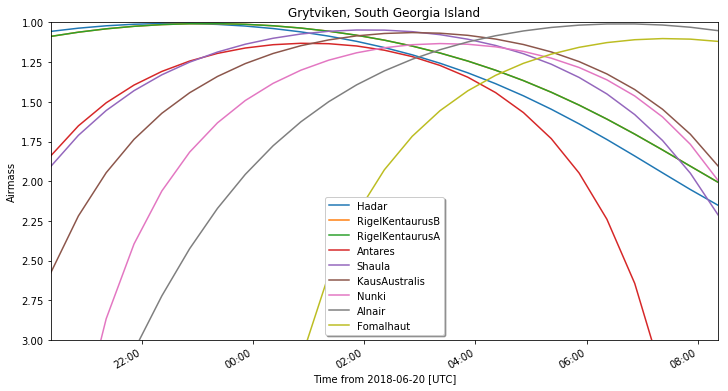

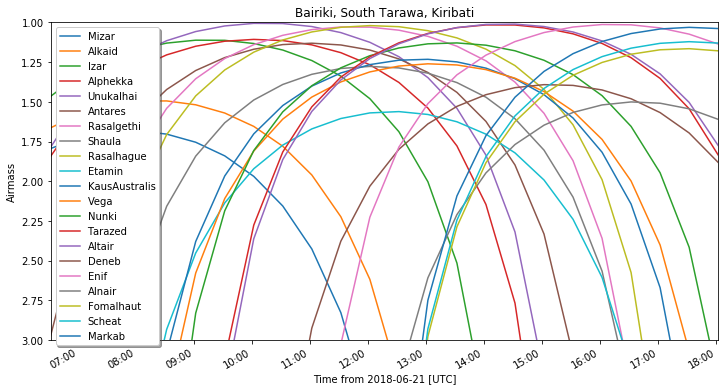

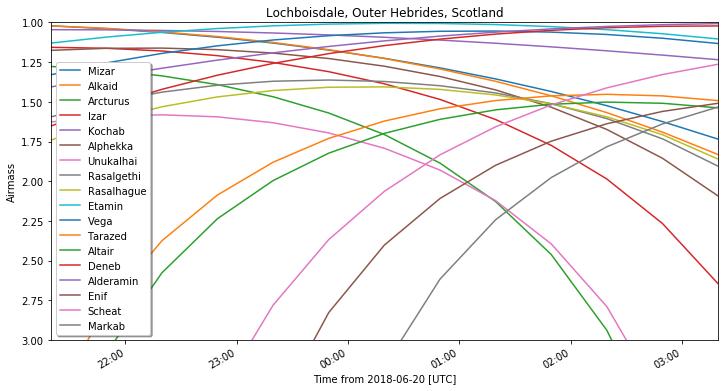

In [22]:
import numpy as np
from astropy.table import QTable
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import pytz
from astroplan import Observer, FixedTarget
import warnings
warnings.filterwarnings('ignore', category=Warning)
%matplotlib inline
import matplotlib.pyplot as plt
from astroplan import time_grid_from_range
from astroplan.plots import plot_sky, plot_airmass
from astroplan import AirmassConstraint, MoonSeparationConstraint
from astroplan import observability_table


star_table = QTable.read('TargetStars.csv', format='ascii.csv')

targets = [FixedTarget(coord=SkyCoord(ra = RA*u.hourangle, dec = DEC*u.deg), name=Name)
           for Name, RA, DEC in star_table]

observe_date = Time("2018-06-21", format='iso')

g_location = Observer(longitude = -36.508 * u.deg,
                    latitude = -54.2815 * u.deg,
                    timezone = 'America/Noronha',
                    name = "Grytviken"
                    )

b_location = Observer(longitude = 172.983333 * u.deg,
                    latitude = 1.325556 * u.deg,
                    timezone = 'Pacific/Tarawa',
                    name = "Bairiki"
                    )

L_location = Observer(longitude = -7.309 * u.deg,
                    latitude = 57.154 * u.deg,
                    timezone = 'GMT',
                    name = "Lochboisdale"
                    )

g_start = g_location.twilight_evening_astronomical(observe_date, which='nearest')  
g_end = g_location.twilight_morning_astronomical(observe_date, which='next')
g_observing_range = [g_start, g_end]

b_start = b_location.sun_set_time(observe_date, which='nearest')  
b_end = b_location.sun_rise_time(observe_date, which='next')
b_observing_range = [b_start, b_end]

L_start = L_location.sun_set_time(observe_date, which='nearest')  
L_end = L_location.sun_rise_time(observe_date, which='next')
L_observing_range = [L_start, L_end]

constraints = [AirmassConstraint(2)]
constraints.append(MoonSeparationConstraint(30*u.deg))

g_observing_table = observability_table(constraints, g_location, targets, time_range=g_observing_range)
b_observing_table = observability_table(constraints, b_location, targets, time_range=b_observing_range)
L_observing_table = observability_table(constraints, L_location, targets, time_range=L_observing_range)


fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

ax.set_title("Grytviken, South Georgia Island")
    
for idx, my_object in enumerate(targets):
    
    if g_observing_table['ever observable'][idx]:
        ax = plot_airmass(my_object, g_location, g_time_grid)
        
ax.legend(loc=0,shadow=True);        
        
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

ax.set_title("Bairiki, South Tarawa, Kiribati");

for idx, my_object in enumerate(targets):
    
    if b_observing_table['ever observable'][idx]:
        ax = plot_airmass(my_object, b_location, b_time_grid)
        
ax.legend(loc=0,shadow=True);        

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

ax.set_title("Lochboisdale, Outer Hebrides, Scotland")
        
for idx, my_object in enumerate(targets):
    
    if L_observing_table['ever observable'][idx]:
        ax = plot_airmass(my_object, L_location, L_time_grid) 

ax.legend(loc=0,shadow=True);

print("As shown by the graphs, Bairiki, South Tarawa, Kiribati is the best observing location, because it has the "
        "highest number of stars visible for the largest amount of the night. Lochboisdale, Outer Hebrides, Scotland"
      "is the second best location, with the second highest number of stars visible for the largest amount of the night. "
      "Grytviken, South Georgia Island is the worst location, because it has the lowest number of stars visible for the "
      "largest amount of the night.")

### Due Tue Nov 14 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  